In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# 1. Подготовили данные для анализа.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/vvw4a549ivhzwfg/adult.data

In [ ]:
adult = pd.read_csv('adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

Выводим первые 10 строк данных.

In [ ]:
adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Считаем размерность данных.

In [ ]:
adult.shape

(32561, 15)

Выводим количество пропущенных значений и тип для каждой переменной.

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Этап предобработки данных.

In [ ]:
# Удалим лишние признаки
adult.drop(['native-country'], axis=1, inplace=True)
# Преобразуем целевую переменную в бинарные значения, ниже 50 тысяч - 0, выше -1
adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Преобразуем категориальные данные в числовые
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
adult.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,31,45781,14,14084,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42,159449,13,5178,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

In [ ]:
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
adult.shape

(32561, 67)

Посмотрим на технические параметры загруженных данных для обучения. Для этого вызовем метод describe().

Для удобства отображения транспонируем результат: меняем местами столбцы и строки.

In [ ]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,-2.705915e-17,1.000015,-1.582206,-0.775768,-0.115955,0.690484,3.769612
fnlwgt,32561.0,-1.001625e-16,1.000015,-1.681631,-0.681691,-0.108219,0.447877,12.268563
education-num,32561.0,1.471887e-16,1.000015,-3.529656,-0.420060,-0.031360,0.746039,2.300838
capital-gain,32561.0,1.309314e-17,1.000015,-0.145920,-0.145920,-0.145920,-0.145920,13.394578
capital-loss,32561.0,1.016900e-16,1.000015,-0.216660,-0.216660,-0.216660,-0.216660,10.593507
...,...,...,...,...,...,...,...,...
race_ Black,32561.0,9.594300e-02,0.294518,0.000000,0.000000,0.000000,0.000000,1.000000
race_ Other,32561.0,8.322840e-03,0.090851,0.000000,0.000000,0.000000,0.000000,1.000000
race_ White,32561.0,8.542735e-01,0.352837,0.000000,1.000000,1.000000,1.000000,1.000000
sex_ Female,32561.0,3.307945e-01,0.470506,0.000000,0.000000,0.000000,1.000000,1.000000


Выводы: 

У столбца salary среднее 0,24. Значит,у 24% в нашей выборке зп больше 50К.

Количество всех показателей соответсвует 32561 значений, значит, все данные заполнены.

У многих показателей значений нулевые.


# 2. Построим модель логистической регрессии. 
- разобъем таблицу данных на матрицы X и y. 
- обучим логистическую регрессию.

Обратим внимание на целевой признак salary - заработную плату.

Чтобы посчитать количество людей с з.п. меньше или равное 50К (значение переменной salary равно нулю) и з.п. большо 50К (значение salary равно единице) вызовем метод value_counts()

В ней значение 1 класса меньше, чем значение класса 0, т.е. выборка наша несбалансирована.



In [ ]:
adult['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

Модель логистической регрессии, max_iter - число операций для обучения

In [ ]:
lr = linear_model.LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [ ]:
y = adult['salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

In [ ]:
X = adult.drop('salary', axis=1)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Обучаем модель:

In [ ]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

Выводы: мы создали прототипы обеих моделей, обучили с помощью выборки.

Для этого вызвали метод fit() у каждой модели и передали ему на вход два аргумента: таблицу входных признаков и столбец значений целевой переменной - (X, y).

Сделали все верно поэтому получилось обучить модель.

# 3. Провалидируем модель на тестовых данных 
- сделаем предсказания на тренировочной выборке 
- вычислим вероятности принадлежности к классам для каждого объекта из тестовой выборки

In [ ]:
#обучающая выборка
%%capture
!wget https://www.dropbox.com/s/cjjzvrpfrsqpjrv/adult.test.csv

In [ ]:
adult_test = pd.read_csv('adult.test.csv',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

Необходимо провалидировать модели на новых тестовых данных, которые не используются для обучения модели. Тестовые данные нужно предобработать аналогично обучающим.

In [ ]:
adult_test.shape

(16281, 15)

In [ ]:
adult_test.info

In [ ]:
adult_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Этап предобработки данных

In [ ]:
# Удалим лишние признаки
adult_test.drop(['native-country'], axis=1, inplace=True)
# Преобразуем целевую переменную в бинарные значения, ниже 50 тысяч - 0, выше -1
adult_test['salary'] = (adult_test['salary'] != ' <=50K').astype('int32')
# Преобразуем категориальные данные в числовые
adult_test = pd.get_dummies(adult_test, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
adult_test.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
5,34,198693,6,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,29,227026,9,0,0,40,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
7,63,104626,15,3103,0,32,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,24,369667,10,0,0,40,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
9,55,104996,4,0,0,10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Нормализовать нуждающиеся в этом признаки
a_features_t = adult_test[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
a_features_t

In [ ]:
# Нормализовать нуждающиеся в этом признаки
norm_features_t = (a_features_t - a_features_t.mean(axis=0)) / a_features_t.std(axis=0)
adult_test.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features_t

In [ ]:
y_test = adult_test['salary']
y_test.shape

(16281,)

In [ ]:
X_test = adult_test.drop(['salary'], axis=1)
X_test.shape

(16281, 66)

Сначала получим прогноз модели на тестовых данных X_test с помощью моделей логистической регрессии. Для этого запустим метод predict().

In [ ]:
test_predict = lr.predict(X_test)

Посмотрим, сколько предсказаний каждого вида (з.п. меньше или равную 50К и з.п. больше 50К) спрогнозировали модели. Для этого необходимо вызвать функцию value_counts() из библиотеки pandas для полученных прогнозов.

In [ ]:
pd.value_counts(test_predict)

0    13123
1     3158
dtype: int64

Вывод: Модель логичстической регрессии предсказывает 3158 людей, у которых з.п. выше 50К и 13123 людей нашей тестовой выборки, у которых з.п. ниже или равна 50К.

Вместо прогноза меток классов модель может с помощью метода predict_proba() выдавать метки вероятности принадлежности к классам. Так как класса у нас 2: люди с з.п.<=50К и з.п.>50К, то матрица будет размером в 2 столбца(количество объектов в тестовой выборке, 2). Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей. Вероятность принадлежности к первому классу - в 1 столбце матрицы вероятностей.

In [ ]:
probabilities = lr.predict_proba(X_test)
probabilities[:10, :]

array([[0.99770104, 0.00229896],
       [0.88074104, 0.11925896],
       [0.61722991, 0.38277009],
       [0.25109094, 0.74890906],
       [0.99861829, 0.00138171],
       [0.99552756, 0.00447244],
       [0.99009905, 0.00990095],
       [0.1163752 , 0.8836248 ],
       [0.993786  , 0.006214  ],
       [0.95397727, 0.04602273]])

# 4. Оцените качество модели на основе предсказаний по тестовой выборке по помощи стандартных метрик качества для регрессионных моделей.


In [ ]:
probabilities[:5, :]

array([[0.99770104, 0.00229896],
       [0.88074104, 0.11925896],
       [0.61722991, 0.38277009],
       [0.25109094, 0.74890906],
       [0.99861829, 0.00138171]])

In [ ]:
probabilities = probabilities[:, 1]

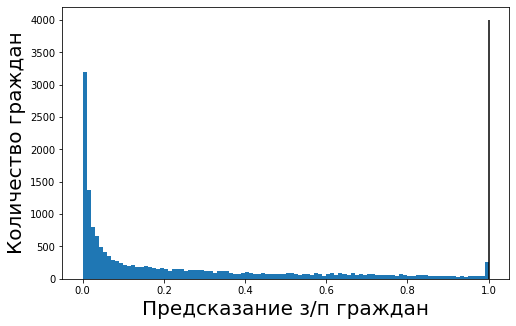

In [ ]:
plt.figure(figsize=(8,5))

plt.hist(probabilities, bins=100)
plt.vlines(1.0, 0, 4000)

plt.xlabel('Предсказание з/п граждан', fontsize=20)
plt.ylabel('Количество граждан', fontsize=20);

Вывод:

Распределение сконцентрировано на всем отрезке, но значительное часть на отрезке 0.0 - 0.2 и небольшая доля на 1. Из этого можно предположить, что классификатор склонен классифицировать все объекты скорее как 0. Это происходит потому, что меток 1 в обучающей выборке сильно меньше, чем меток 0. Т.е. мы видим на графике, что у значительной доли граждан з/п меньше или равна 50К. И у малой часати граждан з/п больше 50К.